
GUID: 2663452m

# Introduction

Spectroscopy is the study of absorbtion and emission of electromagnetic radiation by matter. It allows for the determinition of the chemical composition of an object by observing the wavelengths of light that are absorbed or emitted by the object. This is beacuse the wavelength of light has a corresponding energy given by $E = \frac{hc}{\lambda}$ where $h$ is Planck's constant and $c$ is the speed of light. The energy levels of an atom are quantised and so only certain wavelengths of light can be absorbed or emitted by an atom. And thus by determining the energy of photons they can be matched to the difference in energy levels of an atom.
The emssion of photons from an atom corresponds to the transition of an electron from a higher energy level to that of a lower energy, due to the conservation of energy, the difference between these levels is emitted as a photon, for the electron to be in the higher energy level (excited state) to begin with it must be supplied with some amount of energy this is done due to the absorbtion of a photon by the atom which has the same energy as the difference between the energy levels. 
In this lab the Balmer series of Hydrogen is being studied which corresponds to the visible wavelengths of a Hydrogen atoms emission spectrum and will be discussed in more detail later.

# Aims

Spectroscopy is the study of absorbtion and emission of electromagnetic radiation by matter. It allows for the determinition of the chemical composition of a 
The aims of this experiment are to understand how a spectrometer works and understand how this can be used by obtaining results from a Hydrogen lamp, LED's and a Birefringent filter

# Equipment

Experimental and analytical equipment used in this experiment include:

* Digital Spectrometer (Ocean Optics Red Tide USB650)  <br>
* Fiber Optic Cable  <br>
* Mercury Lamp  <br>
* Hydrogen Lamp  <br>
* LED's (Five colours)  <br>
* Birefringent Filter  <br>
* Tungsten Lamp  <br>
* Two Polarising Filters  <br>
* SpectraSuite Software  <br>
* Python 3.10.11  <br>




In [123]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import find_peaks
import scipy.constants as const
import pandas as pd
import os
from scipy.optimize import curve_fit
from scipy.interpolate import splrep, sproot, splev
plt.style.use('../report.mplstyle')


# Calibration

In this section of the lab we used a mercury lamp and known peaks in the 350-1000nm range to calibrate the linear CCD in the spectrometer

## Method 
The spectrometer was connected ot the fiber optic and the fiber optic was pointed at a mercury lamp, data was taking invloving the CCD pixel number at each peak observed, these peaks were then assigned a wavelength based on the known emission peaks of Mercury, this allowed for a one to one wavelength to pixel number mapping to be created. This was then used to calibrate the spectrometer. 
The calibration curve can be observed below showing that the true and predicted wavelengths are linearly related

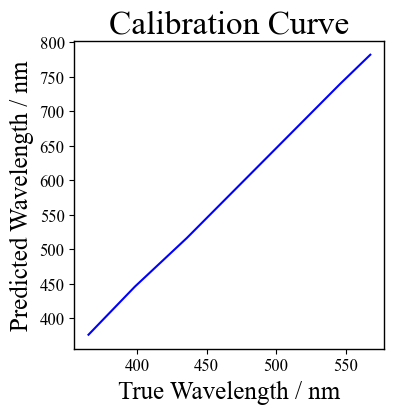

In [124]:
data = np.loadtxt('data/cali.txt')

plt.figure(figsize=(4,4))
plt.plot(data[:, 0], data[:, 1], color ='blue')
plt.xlabel('True Wavelength / nm')
plt.ylabel('Predicted Wavelength / nm')
plt.title('Calibration Curve')
plt.show()



From this calibration curve we can see that our CCD has a linear systematic error 

# Investigating the Atomic Spectrum of Hydrogen

## Objectives
* To measure the wavlengths of the Balmer series of Hydrogen from a discharge tube  <br>
* Determine a value for the Rydberg constant from the Balmer series <br>
* Calculate the first ionisation energy of Hydrogen <br>

## Background

Hydrogen has a simple spectrum due to it only containing one electron. When an electron in the nth energy level of Hydrogen drops to a new lower energy level it emits a photon with energy equal to the difference in energy of the two levels. This energy is described by the Rydberg formula:

$$ \frac{1}{\lambda} = R \left( \frac{1}{n_1^2} - \frac{1}{n_2^2} \right) $$ 

and reaaranging for $\Delta E$ gives:

$$ \Delta E = \frac{hc}{\lambda} = hcR \left( \frac{1}{n_1^2} - \frac{1}{n_2^2} \right) $$  

$$ n_1 = 1,2,3,\dots $$
$$ n_2 = n_1 + 1, n_1 + 2, n_1 + 3, \dots $$
where $R$ is the Rydberg constant and $n_1$ and $n_2$ are the energy levels of the electron. The Balmer series of Hydrogen corresponds to the visible wavelengths of light emitted by Hydrogen where $n_1 = 2$ and $n_2 = 3,4,5,6$ and emits photons in the region of 400-700nm. These wavelengths can be theorectically predicted by:

$$ λ = \left(\frac{Bn_2^2}{n_2^2 - n_1^2} \right) $$

for the values of $n_1$ and $n_2$ given above and $B = 3654.6×10^-8 cm$.



## Method

The Red Tide USB650 Spectrometer was connected to a computer running spectrasuite via a USB cable, a fiber optic cable was in place connected to the spectrometer and the other end was clamped on the optical rail pointing towards the Hydrogen discharge lamp, the lamp was plugged in and switched on. Within the spectrasuite software an emission spectrum could be observed however it was saturating the detector so the fiber optic was angled away from the lamp and the Integration Time (Time of one reading displayed in the software) was adjusted to 1s this then produced a steady and clear spectrum in which data can be extracted from. The wavelength and intensity data was recorded from the softeware and python was used to identify the peaks.

## Analysis

The data was imported into python and the peaks were identified using the find_peaks function from the scipy.signal library. The Theorectical and Experimental values can be seen in the table below. A function was then defined to calculate the Rydberg constant, this was done twice with two different equations to compare to see if the obtained values matched, however due to the fact that the second equation is simply a reaarangement of the first equation the values are expected to be identical. The first Rydberg equation is given by:

$$ R = \frac{\Delta E}{hc} \left( \frac{1}{n_2^2} - \frac{1}{n_1^2} \right)^{-1} $$

and the second is given by:

$$ R = -\frac{1}{λ} \left( \frac{1}{n_2^2} - \frac{1}{n_1^2} \right)^{-1} $$

where $R$ is the Rydberg constant, $λ$ is the wavelength of the emitted light,l $h$ is Plancks Constant, $c$ is the speed of light, $\Delta E$ is the difference in energy between energy levels $n_1$ and $n_2$ and $n_1 = 2$ and $n_2 = 3,4,5,6$.

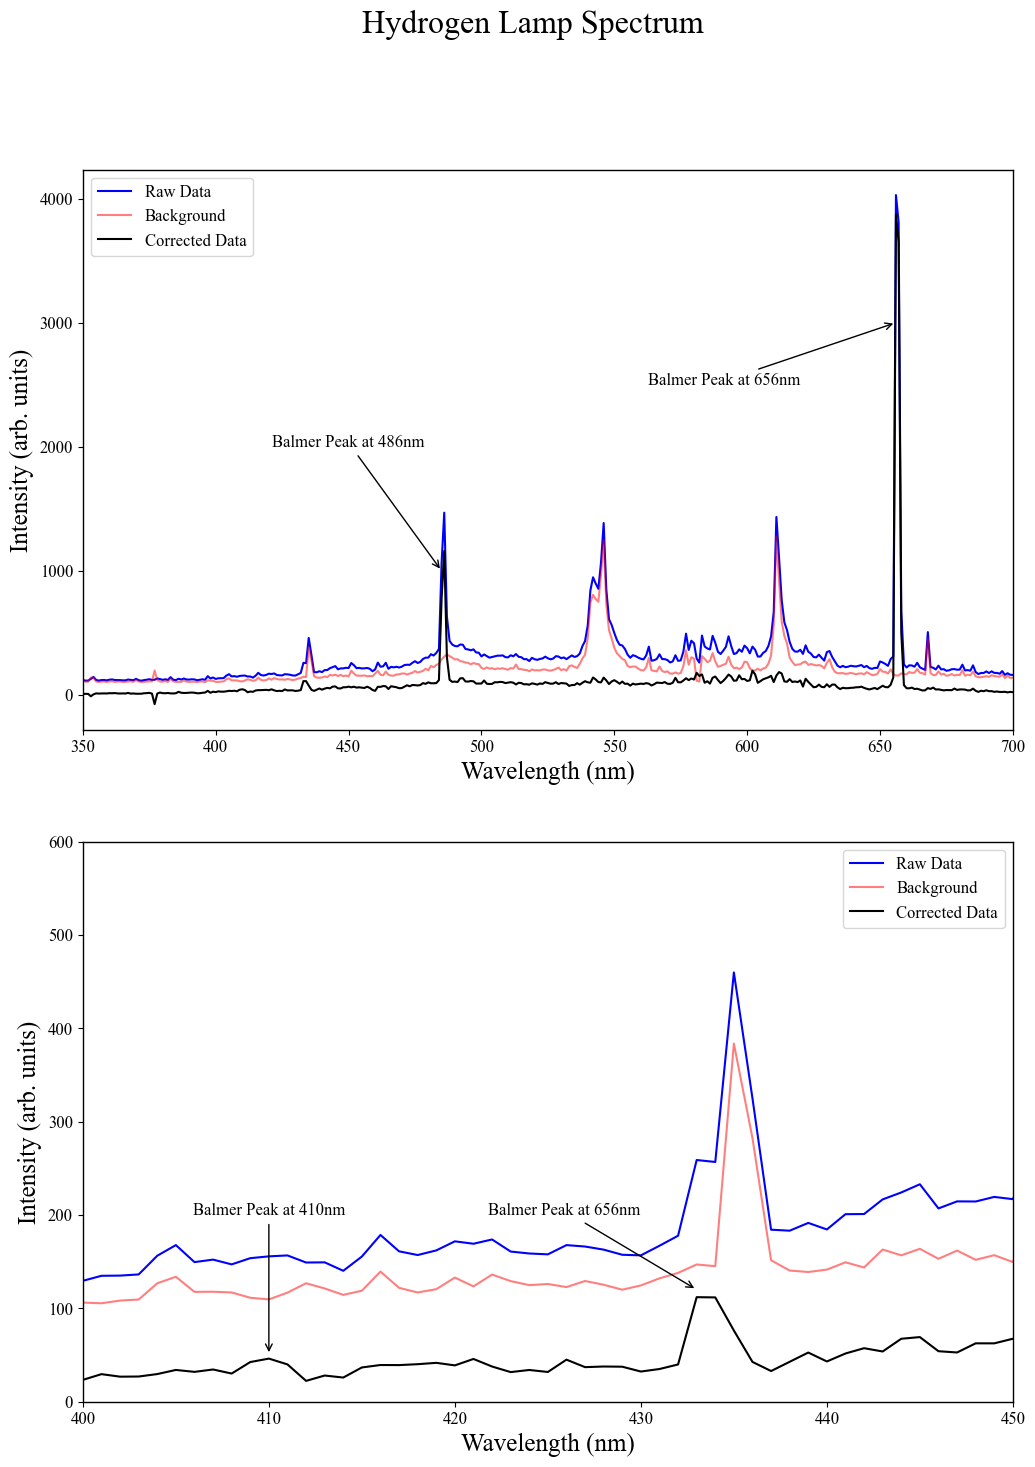

In [125]:
def loadtxt(filename):    # function to load data from text file
    data = np.loadtxt(filename, delimiter='\t', skiprows = 17)
    return data

h_lamp = loadtxt('data/H_lamp/H_lamp0.txt')   # load data from text file
background = loadtxt('data/H_lamp/H_lamp_background0.txt')
h_lamp_cor = h_lamp[:,1] - background[:,1]  # subtract background from data

plt.figure(figsize=(12,16))  # plot data
plt.subplot(2,1,1)
plt.plot(h_lamp[:,0], h_lamp[:,1],color = 'blue', label = 'Raw Data')
plt.plot(background[:,0], background[:,1], color = 'red',alpha = 0.5, label = 'Background')
plt.plot(h_lamp[:,0], h_lamp_cor, color = 'black', label = 'Corrected Data')
plt.xlabel('Wavelength (nm)')
plt.xlim(350,700)
plt.ylabel('Intensity (arb. units)')
plt.suptitle('Hydrogen Lamp Spectrum',fontsize = 23)
plt.ylabel('Intensity (arb. units)')
plt.annotate('Balmer Peak at 486nm', xy=(485, 1000), xytext=(450, 2000), fontsize=12, arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
plt.annotate('Balmer Peak at 656nm', xy=(656, 3000), xytext=(620, 2500), fontsize=12, arrowprops=dict(facecolor='black', arrowstyle='->'), ha='right')
plt.legend()
plt.subplot(2,1,2)
plt.plot(h_lamp[:,0], h_lamp[:,1],color = 'blue', label = 'Raw Data')
plt.plot(background[:,0], background[:,1], color = 'red',alpha = 0.5, label = 'Background')
plt.plot(h_lamp[:,0], h_lamp_cor, color = 'black', label = 'Corrected Data')
plt.xlabel('Wavelength (nm)')
plt.xlim(400,450)
plt.ylim(0,600)
plt.ylabel('Intensity (arb. units)')
plt.annotate('Balmer Peak at 410nm', xy=(410, 50), xytext=(410, 200), fontsize=12, arrowprops=dict(facecolor='black', arrowstyle='->'), ha='center')
plt.annotate('Balmer Peak at 656nm', xy=(433, 120), xytext=(430, 200), fontsize=12, arrowprops=dict(facecolor='black', arrowstyle='->'), ha='right')
plt.legend()
plt.show()



In [126]:
peaks,peaks_height = find_peaks(h_lamp_cor, height = 45, distance = 22, prominence = 0.1)  # find peaks in data
peaks = [peaks[0],peaks[1],peaks[3],peaks[9]]   # select peaks of interest
peaks_height = [peaks_height['peak_heights'][0],peaks_height['peak_heights'][1],peaks_height['peak_heights'][3],peaks_height['peak_heights'][9]]


balmer_series = (h_lamp[peaks,0], peaks_height)  # create array of peaks and peak heights
wavenumber = (2*np.pi)/(balmer_series[0]*1e-9)  # calculate wavenumber
balm_freq = const.c/(balmer_series[0]*1e-9)   # calculate frequency
energy = const.h*balm_freq   # calculate energy
balmer_num = np.array([6,5,4,3])   # create array of Balmer numbers

dic = {  # create dictionary of data
'Theorectical Wavelength (nm)':(410,434,486,656) ,
'Experimental Wavelength (nm)':balmer_series[0],
'Wavenumber (1/m) ': wavenumber,
'Frequency (Hz)': balm_freq,
'Energy (J)': energy,
'Balmer Number': balmer_num}

balmer = pd.DataFrame(dic)  # create dataframe from dictionary
N1 = 2
print('Table 1')
(balmer)



Table 1


,Theorectical Wavelength (nm),Experimental Wavelength (nm),Wavenumber (1/m),Frequency (Hz),Energy (J),Balmer Number
0,410,410.0,1.532484e+07,7.312011e+14,4.844990e-19,6
1,434,433.0,1.451082e+07,6.923613e+14,4.587635e-19,5
2,486,486.0,1.292836e+07,6.168569e+14,4.087337e-19,4
3,656,656.0,9.578026e+06,4.570007e+14,3.028119e-19,3


From the data above the Rydberg constant can be calculated and the Fifth Balmer line of Hydrogen of Hydrogen can be calculated which is expected to be at 397nm. Followed by the First ionisation energy.

In [127]:
def ryd_eq(del_e,n2,n1 = N1):   # function to calculate Rydberg constant
    x = 1/(n2**2) - 1/(n1**2)
    return del_e/(-const.h*const.c*x)

def ryd_eq3(wavelength,n2,n1 = N1):  # function to calculate Rydberg constant from different formula
    x = 1/(n2**2) - 1/(n1**2)
    return 1/((-wavelength*1e-9)*x)
for i in range(4):  # calculate Rydberg constant for each peak
    mean_ryd = (np.mean(ryd_eq(energy[i],balmer_num[i])))
    mean_ryd3 = (np.mean(ryd_eq3(balmer_series[0][i],balmer_num[i])))

def n7(n2,n1 = N1):  # function to calculate wavelength of 7th Balmer line
    x = 1/(n2**2) - 1/(n1**2)
    return 1/(-mean_ryd*x)
print(f'Rydberg constant from eqn 1: {mean_ryd:.4e}J')
print(f'Rydberg constant from eqn 3: {mean_ryd3:.4e}J')

print(f'Fifth Balmer line of hydrogen at {n7(7):.4e}m')


Rydberg constant from eqn 1: 1.0976e+07J
Rydberg constant from eqn 3: 1.0976e+07J
Fifth Balmer line of hydrogen at 3.9684e-07m


The Fifth Balmer line appears in the spectrum but as a very small peak that could be categorized as noise if it wasnt known to be there

In [128]:
def ion_energy(n):  # function to calculate first ionisation energy of hydrogen
    return mean_ryd*const.c*const.h/1/(n**2)*1e-3*const.N_A

print(f'First Ionisation energy of hydrogen is {ion_energy(1):.2f} kJ/mol')


First Ionisation energy of hydrogen is 1312.97 kJ/mol


To compare this ionisation energy to that quoted in Kaye and Laby it is useful to be in eV thus giving an ionisation energy of 13.631eV which is very close to the accepted value of 13.598eV.



# Investigating the Spectra of LED's

## Objectives 
* To measure the emission spectra of five different LED's  <br>
* To determine the peak wavelength of the emission spectra of the LED's  <br>
* To determine the FWHM of the emission spectra of the coloured LED's  <br>
* To determine the p-n junction temperatures of the coloured LED's  <br>

## Background

LED's are made of a semiconductor material that emit light due to the decrease in energy of electrons as they cross the band-gap of the semiconductor material, this range of enrgies is very small and therefore the light produced is only over a small range of wavelengths, an LED with a suffieciently small bandgap would produce monochromatic light (light of exactly 1 wavelength) similar to that of a laser. To allow for electrons to cross the band-gap of a semiconductor it must have suffiecient energy and this is determined by the drive voltage of the LED given by the equation:

$$ V = \frac{h\nu}{e} ≈ \frac{E_g}{e}$$

where $V$ is the drive voltage, $h$ is Planck's constant, $\nu$ is the frequency of the light emitted, $e$ is the charge of an electron and $E_g$ is the band-gap energy of the semiconductor material.

## Method

The Red Tide USB650 Spectrometer was connected to a computer running spectrasuite via a USB cable, a fiber optic cable was in place connected to the spectrometer and the other end was clamped on the optical rail pointing towards the LED's, the LED's were plugged in and switched on. Within the spectrasuite software an emission spectrum could be observed, there was a dial on the LED that allowed for the brightness (intensity) of the LED to be adjusted, this was used to ensure the LED didnt saturate the CCD. An integration time of 10ms was selected as the LED's were not as bright as the hydrogen lamp. The wavelength and intensity data was recorded from the softeware. This ecaxt setup was repeated for each of the five LED's with the only difference being the dial for brightness being adjusted each time.
During setup of the yellow LED there was an anomaly noticed in its spectrum all the LED's produce a flat signal of near 0 intensity except at the wavelength of the colour emitted, however, in the yellow spectrum there was a secondary very minor peak at around the 800-900nm range, this can be seen in graphs throughout this section. It was also observed that the supposedly yellow LED was more of an orange colour, this does not directly affect the results except in the case of comparing the LED to the theoretical value of the band-gap energy of the LED, or other LED's. A background readin was also taken and has been subtracted from all the data in this section.

## Analysis

Initially a graph showing all 5 spectra was plotted to show the relative position of peaks with eachother and to show that the white LED doesnt have a simple single peak emission but instead has a blue wavelength emission which is reabsorbed and re-emitted as a green-yellow wavelength emission. The graph can be seen below. The peak wavelength of each LED was determined and from this the Full width at half maximum (FWHM) was calculated. This allowed for the first Characteristic component of the LED's to be calculated which is the drive volatage of the LED using the equation above. These are shown in Table 2 below.

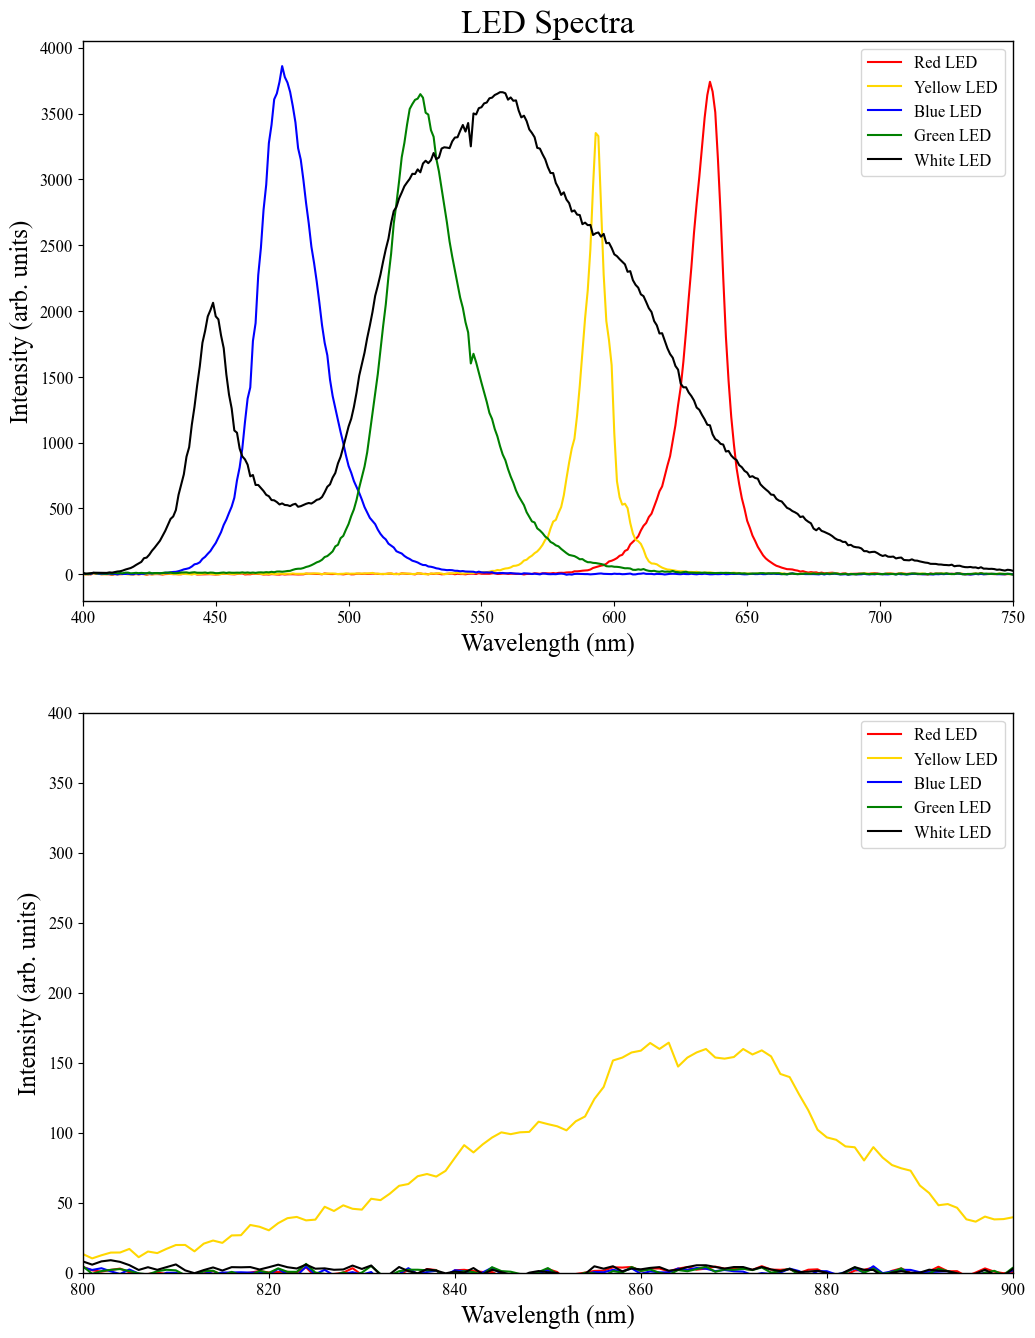

In [129]:
red = loadtxt('data/LED/data/red_led0.txt')  # load data from text files
yellow = loadtxt('data/LED/data/yellow_led0.txt')
blue = loadtxt('data/LED/data/blue_led0.txt')
green = loadtxt('data/LED/data/green_led0.txt')
white = loadtxt('data/LED/data/white_led0.txt')
background = loadtxt('data/LED/background_intensity0.txt')

red[:,1] = red[:,1]- background[:,1]  # subtract background from data
yellow[:,1] = yellow[:,1] - background[:,1]
blue[:,1] = blue[:,1] - background[:,1]
green[:,1] = green[:,1] - background[:,1]
white[:,1] = white[:,1] - background[:,1]

plt.figure(figsize=(12,16))  # plot data
plt.subplot(2,1,1)
plt.plot(red[:,0], red[:,1],color = 'red', label = 'Red LED')
plt.plot(yellow[:,0], yellow[:,1],color = 'gold', label = 'Yellow LED')
plt.plot(blue[:,0], blue[:,1],color = 'blue', label = 'Blue LED')
plt.plot(green[:,0], green[:,1],color = 'green', label = 'Green LED')
plt.plot(white[:,0], white[:,1],color = 'black', label = 'White LED')

plt.xlabel('Wavelength (nm)')
plt.xlim(400,750)
plt.ylabel('Intensity (arb. units)')
plt.title('LED Spectra')
plt.legend()
plt.subplot(2,1,2)
plt.plot(red[:,0], red[:,1],color = 'red', label = 'Red LED')
plt.plot(yellow[:,0], yellow[:,1],color = 'gold', label = 'Yellow LED')
plt.plot(blue[:,0], blue[:,1],color = 'blue', label = 'Blue LED')
plt.plot(green[:,0], green[:,1],color = 'green', label = 'Green LED')
plt.plot(white[:,0], white[:,1],color = 'black', label = 'White LED')
plt.xlabel('Wavelength (nm)')
plt.xlim(800,900)
plt.ylim(0,400)
plt.ylabel('Intensity (arb. units)')
plt.legend()

plt.show()



In [130]:
path = 'data/LED/data/'  # create array of file names
files = os.listdir(path)

peak = []
peaks_heights = []
for file in files:  # find peaks in data
    data = loadtxt(path+file)
    background = loadtxt('data/LED/background_intensity0.txt')
    data[:,1] = data[:,1]- background[:,1]
    peaks,peak_heights = find_peaks(data[:,1],height = 3000, distance = 50)
    peak.append(peaks[0])
    peaks_heights.append(peak_heights)  # create array of peak heights



In [131]:
from scipy.interpolate import splrep, sproot, splev

class MultiplePeaks(Exception): pass
class NoPeaksFound(Exception): pass

def fwhm(x, y, k=3):  # function to calculate full width half maximum


    half_max = max(y)/2.0
    s = splrep(x, y - half_max, k=k)
    roots = sproot(s)

    if len(roots) > 2:
        raise MultiplePeaks("The dataset appears to have multiple peaks, and "
                "thus the FWHM can't be determined.")
    elif len(roots) < 2:
        raise NoPeaksFound("No proper peaks were found in the data set; likely "
                "the dataset is flat (e.g. all zeros).")
    else:
        return abs(roots[1] - roots[0])


for file in files:   # calculate FWHM for each peak
    if file == 'white_led0.txt':  # skip white LED data
        pass
    else:
        data = loadtxt(path+file)

        fwhm_val = fwhm(data[:,0],data[:,1])



def energy_peak(wavelength):  # function to calculate energy of peak
    return const.h*const.c/(wavelength*1e-9)

def drive_vol(wavelength):  # function to calculate drive voltage of LED
    return energy(wavelength)/const.e

def energy(wavelength):   # function to calculate energy of LED
    return const.h*const.c/(wavelength*1e-9)

led_data = {  # create dictionary of data
'colour': ['green','red','yellow','blue'],
'peak_wavelength': [green[peak[0],0],red[peak[1],0],yellow[peak[3],0],blue[peak[4],0]],
'peak_intensity': [peaks_heights[1]['peak_heights'][0],peaks_heights[3]['peak_heights'][0],peaks_heights[4]['peak_heights'][0],peaks_heights[3]['peak_heights'][0]],
'FWHM': [fwhm(green[:,0],green[:,1]),fwhm(red[:,0],red[:,1]),fwhm(yellow[:,0],yellow[:,1]),fwhm(blue[:,0],blue[:,1])],
'peak_energy (J)': [energy_peak(green[peak[0],0]),energy_peak(red[peak[1],0]),energy_peak(yellow[peak[3],0]),energy_peak(blue[peak[4],0])],
'drive_voltage (V)': [drive_vol(green[peak[0],0]),drive_vol(red[peak[1],0]),drive_vol(yellow[peak[3],0]),drive_vol(blue[peak[4],0])],
'energy': [energy(green[:,0]),energy(red[:,0]),energy(yellow[:,0]),energy(blue[:,0])],
'intensity': [green[:,1],red[:,1],yellow[:,1],blue[:,1]],
'energy_ev': [energy(green[:,0])/const.e,energy(red[:,0])/const.e,energy(yellow[:,0])/const.e,energy(blue[:,0])/const.e],
}

drive = pd.DataFrame(led_data,columns = ['colour', 'peak_energy (J)','drive_voltage (V)'])  # create dataframe from dictionary



In [132]:
print('Table 2')
drive


Table 2


,colour,peak_energy (J),drive_voltage (V)
0,green,4.181991e-19,2.610194
1,red,3.769347e-19,2.352641
2,yellow,3.566330e-19,2.225928
3,blue,3.349824e-19,2.090796


From here the peaks for the white LED were calculated and plotted onto the white Spectrum this is shown below 

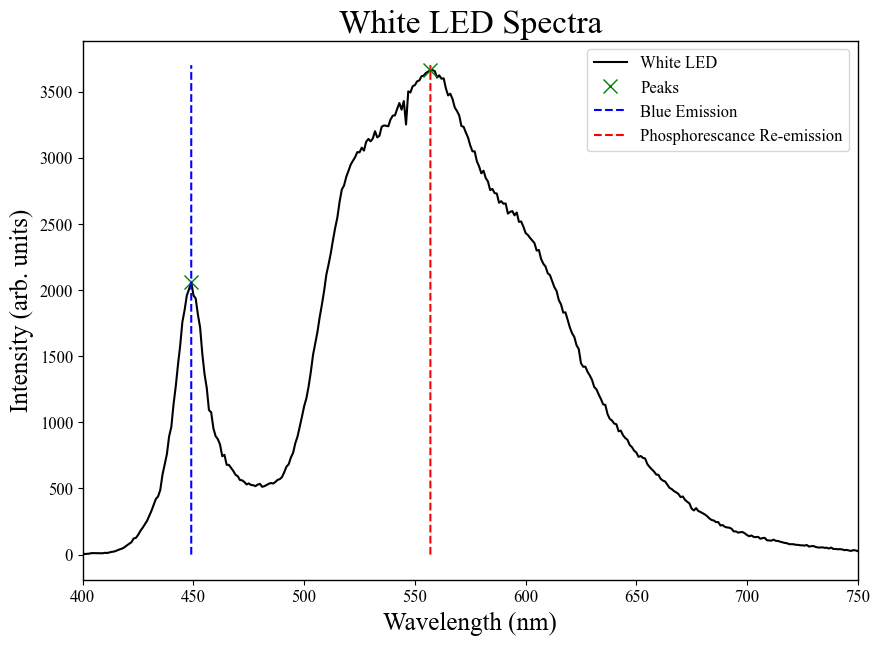

The peak wavelength of the blue semiconductor material is 449.0nm and the peak wavelength of the phosphorescance re-emission is 557.0nm


In [133]:
peaks,peak_heights = find_peaks(white[:,1],height = 2000, distance = 100)  # find peaks in data

intense = np.linspace(0,3700,10000)
peak_1 = np.full_like(intense,white[peaks[0],0])  # create array of peak wavelengths
peak_2 = np.full_like(intense,white[peaks[1],0])
plt.figure(figsize=(10,7))  # plot data
plt.plot(white[:,0], white[:,1],color = 'black', label = 'White LED')
plt.plot(white[peaks,0], white[peaks,1], 'x',color = 'green', label = 'Peaks', markersize = 10)
plt.plot(peak_1, intense, '--',color = 'blue', label = 'Blue Emission')
plt.plot(peak_2, intense, '--',color = 'red', label = 'Phosphorescance Re-emission')
plt.xlabel('Wavelength (nm)')
plt.xlim(400,750)
plt.ylabel('Intensity (arb. units)')
plt.title('White LED Spectra')
plt.legend()
plt.show()
print(f'The peak wavelength of the blue semiconductor material is {white[peaks[0],0]}nm and the peak wavelength of the phosphorescance re-emission is {white[peaks[1],0]}nm')


Finally in this section a MAxwell-Boltzmann Distribution was fitted to the 70% value to the baseline of the spectrum for the coloured LED's, where the Maxwell-Boltzmann Distribution is given by:

$$ f(E) = Ae^{\frac{-\epsilon}{kT}} $$

where $f(E)$ is the probability of an electron having energy $E$, $A$ is a constant, $\epsilon$ is the energy of the electron, $k$ is Boltzmann's constant and $T$ is the temperature of the p-n juction. In this case the energy is in eV and therfore the Boltzmann constant is $8.617×10^{-5} eV/K$.

The colour temperature of the green LED is 502.10 +/- 3.34 K
The colour temperature of the red LED is 341.45 +/- 1.51 K
The colour temperature of the yellow LED is 309.15 +/- 1.35 K
The colour temperature of the blue LED is 495.61 +/- 3.23 K


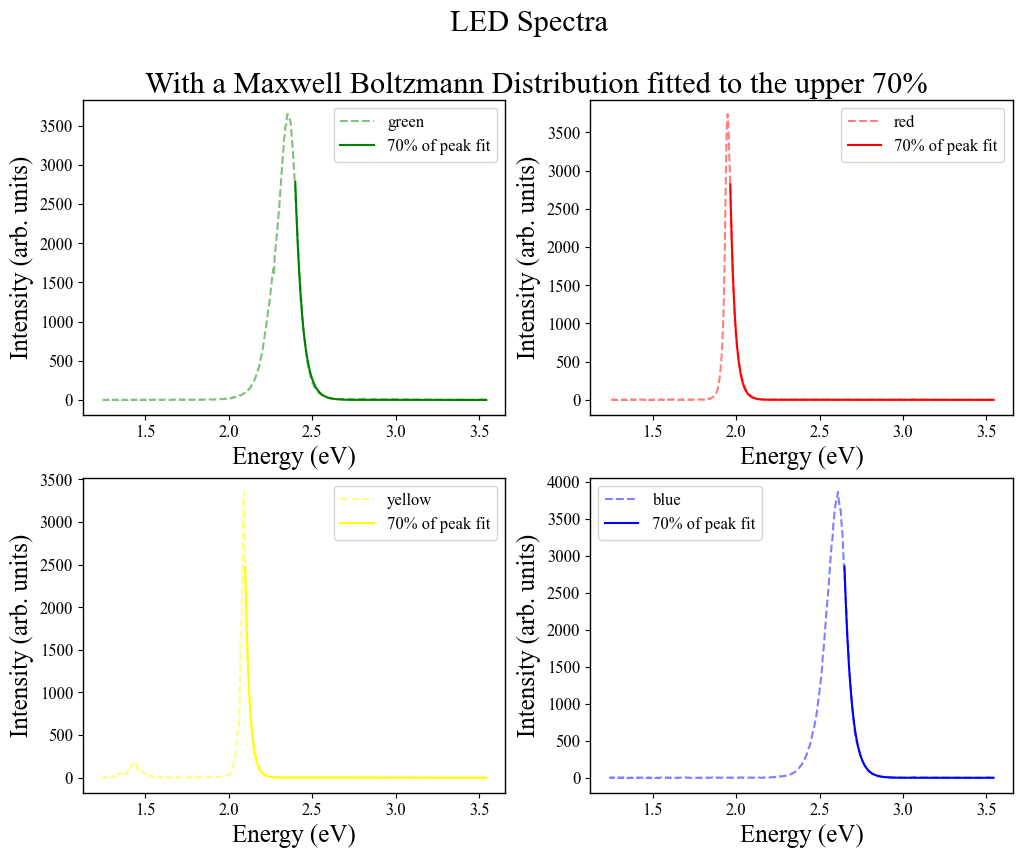

In [134]:
def maxwell_boltzmann(x, a, b):  # function to calculate maxwell boltzmann distribution
    return a*np.exp(-x/(kB*b))


guess = [[1.9*10**30,350],[1.9*10**30,390],[1.9*10**30,350],[1.9*10**30,450]]  # create array of guesses for fitting
index_70_percentx = []

kB = 8.617e-5  # Boltzmann constant in eV/K


plt.figure(figsize=(12,9))

for i in np.arange(len(led_data['energy'])):  # fit maxwell boltzmann distribution to each peak
    data_array = led_data['intensity'][i]
    peak_value = np.max(data_array)  # Find the maximum y value
    value_70_percent = peak_value * 0.7  # Calculate 70% of the peak value

    index_70_percent = np.where(data_array >= value_70_percent)[0][1]  # Find the index of 70% peak value
    index_70_percentx.append(index_70_percent)


    popt, pcov = curve_fit(maxwell_boltzmann, led_data['energy_ev'][i][:index_70_percentx[i]], led_data['intensity'][i][:index_70_percentx[i]], p0 = guess[i],maxfev = 1000000)  # fit maxwell boltzmann distribution to data
    err = np.sqrt(np.diag(pcov))

    print(f'The colour temperature of the {led_data["colour"][i]} LED is {popt[1]:.2f} +/- {err[1]:.2f} K')
    plt.suptitle('LED Spectra \n \n With a Maxwell Boltzmann Distribution fitted to the upper 70%', fontsize=22) # plot data
    plt.subplot(2,2,i+1)
    plt.plot(led_data['energy_ev'][i],led_data['intensity'][i], label = led_data['colour'][i],color = led_data['colour'][i], linestyle = '--',alpha = 0.5)
    plt.plot(led_data['energy_ev'][i][:index_70_percentx[i]], maxwell_boltzmann(led_data['energy_ev'][i][:index_70_percentx[i]], *popt),color = led_data['colour'][i], label='70% of peak fit')
    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (arb. units)')

    plt.legend()
plt.show()



From the Graphs above it can be seen that the fit of the Maxwell-Boltzmann Distribution is very good for the data obtained here and therefore the p-n junction temperatures that have been calculated can be considered accurate and when comparing to the accepted values for this data

| Colour | Theoretical p-n Junction Temperature (K) | Calculated p-n Junction Temperature (K) |
| --- | --- | --- |
| Red | 387 | 341 |
| Green | 530 | 302 |
| Blue | 466 | 495 |
| Yellow | 343 | 309 |


# Investigating Birefringment Interference Filters

## Objectives
* Measure the phase shift of a polymer film across the visible spectrum

## Background

A birefringent material is one with two indices of refraction known as the ordinary nad extraordinary indices of refraction. The ordinary index of refraction is the index of refraction of the material when the light is polarised perpendicular to the optic axis of the material and the extraordinary index of refraction is the index of refraction of the material when the light is polarised parallel to the optic axis of the material. The optic axis of the material is the axis along which the material is isotropic and therefore the index of refraction is the same in all directions. The difference in the indices of refraction of the material is given by:

$$ \Delta n = n_e - n_o $$

where $\Delta n$ is the difference in the indices of refraction, $n_e$ is the extraordinary index of refraction and $n_o$ is the ordinary index of refraction. The phase shift of the light passing through the material is given by:

$$ \Delta \phi = \frac{2\pi}{\lambda} \Delta n d $$

## Method

Once again the Red Tide USB650 Spectrometer was connected to a computer running the spectrasuite software via a USB cable with the fiberoptic installed in the spectrometer and other end clamped facing the tungsten lamp through a analyser, birefringent material filter and a polariser. The Fiber optic was temporarily removed so that the point of 0 transmission of the lamp through the polarisers could be determined by eye, the fiber optic was replaved and a spectrum was observed with an integration time of 2 seconds, this is the so called crossed setup where no light is transmitted through the polarisers, the data was saved at this point for the intensity and wavelength. The analyser waas then turned 90° and this is now the parallel setup where there is full transmission though the filters and once again the data was taken. During the setup of this section of the experiment we ran into issues with not being able ot detect the spectrum of the lamp over such a distance as required by having the other components between the lamp and the fiber optic, after extensive troubleshooting involving a complete rebuild of the apparatus and moving everything as close together as possible, we were informed that the lamp had an adjustable voltage on the back of the plug that the demonstrators failed to mention when we initially mentioned that we thought the problem was with the lamp and it was very dim. After changing the voltage from 3v to 12v our lamp was much brighter and we immediately could observe the spectrum. In total this error in the setup cost us around 2 hours of time on the final lab day, the implications of this will be discussed in the conclusion.

## Analysis

The data was imported into python and normalised based on the equations 

$$ I_{para-norm} = \frac{I_{parallel}}{I_{parallel}+I_{crossed}} $$

and 

$$ I_{cross-norm} = \frac{I_{crossed}}{I_{parallel}+I_{crossed}} $$

where $I_{para-norm}$ is the normalised intensity of the parallel setup, $I_{parallel}$ is the intensity of the parallel setup, $I_{cross-norm}$ is the normalised intensity of the crossed setup and $I_{crossed}$ is the intensity of the crossed setup. The phase shift was then calculated using the equation:

$$ I_{para-norm} = cos^2\left(\frac{\Delta\phi_{actual}}{2}\right) $$ 


$$ I_{cross-norm} = sin^2\left(\frac{\Delta\phi_{actual}}{2}\right) $$ 

and using the rearranged equation:

$$ \Delta\phi_{calculated} = 2arctan\left(\sqrt{\frac{I_{cross-norm}}{I_{para-norm}}}\right)$$

once all these values for $\Delta\phi$ have been calculated, $\Delta\phi_{calculated}$ was plotted against $\Delta\phi_{actual}$




C:\Users\lewis\AppData\Local\Temp\ipykernel_18780\1157773473.py:10: RuntimeWarning: invalid value encountered in arccos
  del_phi = np.arccos((2*theo_i_para)-1)  # calculate phase difference


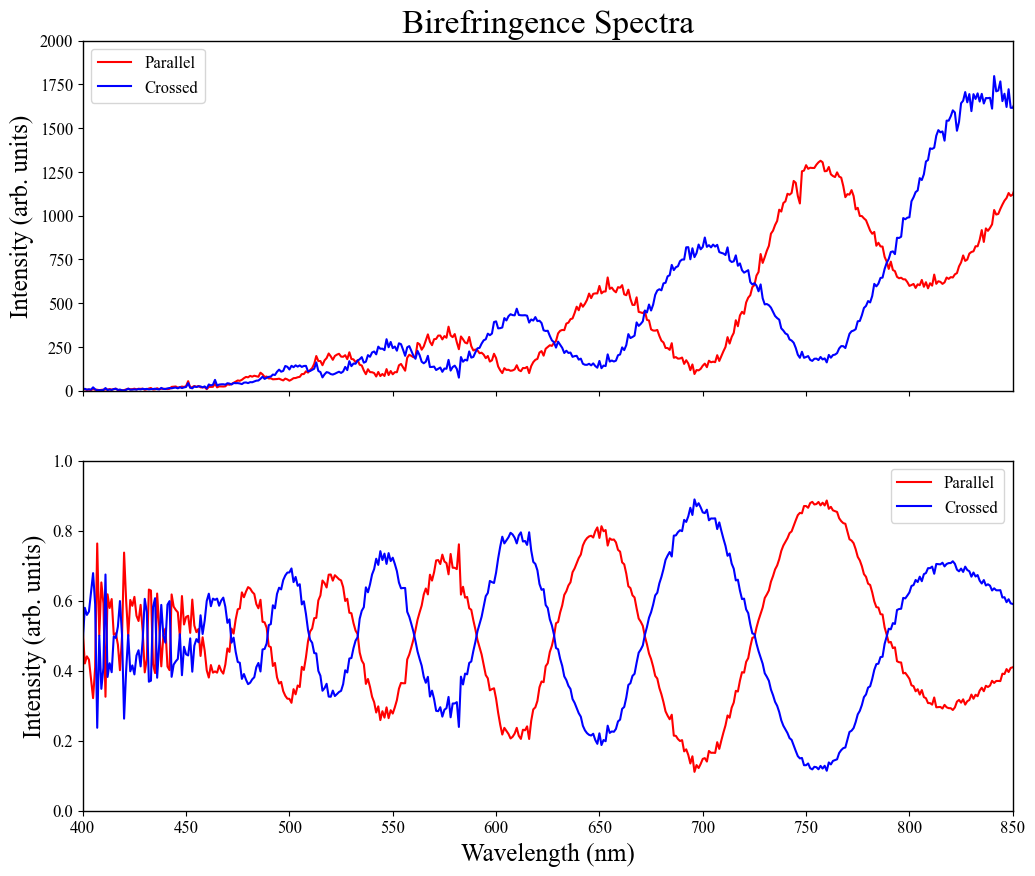

In [135]:
para = loadtxt('data/birefringement/bi_para0.txt')  # load data from text files
cross = loadtxt('data/birefringement/bi_cross0.txt')
back = loadtxt('data/birefringement/bi_back0.txt')

para[:,1] = para[:,1] - back[:,1]  # subtract background from data
cross[:,1] = cross[:,1] - back[:,1]
theo_i_para = para[:,1]/(para[:,1]+cross[:,1])  # calculate normalised intensity
theo_i_cross = cross[:,1]/(para[:,1]+cross[:,1])

del_phi = np.arccos((2*theo_i_para)-1)  # calculate phase difference



plt.figure(figsize=(12,10))  # plot data
plt.subplot(2,1,1)
plt.plot(para[:,0], para[:,1], label = 'Parallel', color = 'red')
plt.plot(cross[:,0], cross[:,1], label = 'Crossed', color = 'blue')
plt.xlim(400,850)
plt.xticks(ticks = np.arange(400,850,50),labels = [])
plt.ylabel('Intensity (arb. units)')
plt.ylim(0,2000)
plt.title('Birefringence Spectra')
plt.legend()


plt.subplot(2,1,2)
plt.plot(para[:,0], theo_i_para, label = 'Parallel', color = 'red')
plt.plot(cross[:,0], theo_i_cross, label = 'Crossed', color = 'blue')
plt.xlabel('Wavelength (nm)')
plt.xlim(400,850)
plt.ylabel('Intensity (arb. units)')
plt.ylim(0,1)
plt.legend()
plt.show()


From these graphs we can see that the crossed setup let through a lower intensity of light across the whole spectrum as expected, and the phase shift between the crossed and parallel setups is linear across the spectrum as expected.

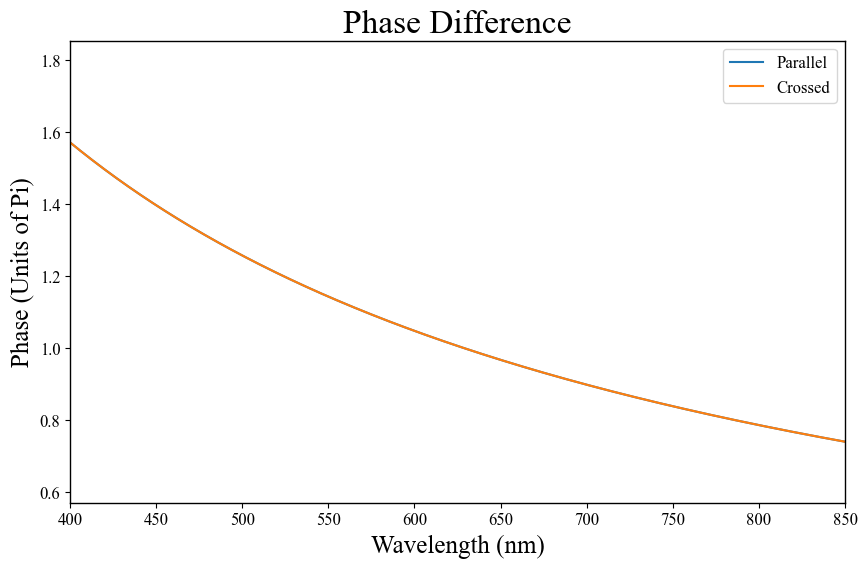

In [136]:
phase = (2*np.pi/para[:,0])*100  # calculate phase difference
phase_cross = (2*np.pi/cross[:,0])*100
plt.figure(figsize=(10,6))  # plot data
plt.plot(para[:,0], phase, label = 'Parallel')
plt.plot(cross[:,0], phase_cross, label = 'Crossed')
plt.xlim(400,850)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Phase (Units of Pi)')
plt.title('Phase Difference')
plt.legend()


We were asked to confrim that phase shift varies inversely with wavelngth, the grpah above clearly shows this correlation.

C:\Users\lewis\AppData\Local\Temp\ipykernel_18780\1796287539.py:1: RuntimeWarning: invalid value encountered in sqrt
  phase_act = 2*np.arctan(np.sqrt((cross[:,1]/para[:,1])))  # calculate actual phase difference


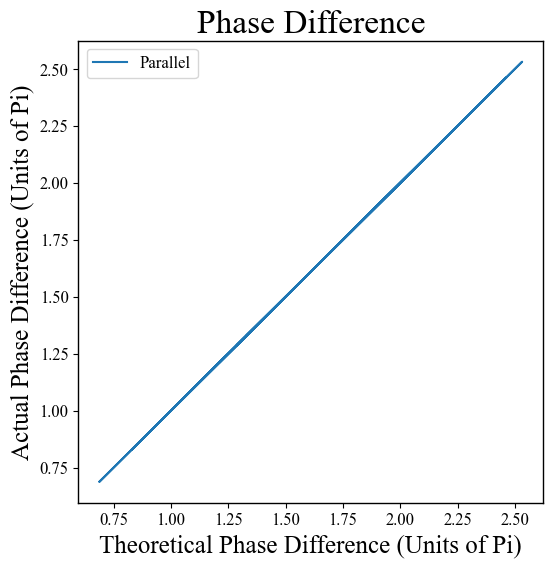

In [137]:
phase_act = 2*np.arctan(np.sqrt((cross[:,1]/para[:,1])))  # calculate actual phase difference

plt.figure(figsize=(6,6))  # plot data
plt.plot(del_phi,phase_act, label = 'Parallel')
plt.xlabel('Theoretical Phase Difference (Units of Pi)')
plt.ylabel('Actual Phase Difference (Units of Pi)')
plt.title('Phase Difference')
plt.legend()
plt.show()



The final part of this section was to determine if the two methods for calculating the phase shift were equivalent, this was noticed by inspection before anything was plotted that the third method was derived from the first two equations and therefore must be equal, this is also shown in the graph above that shows an exact one to one relationship bewtween the two calculated phase shifts.

# Conclusion

To conclude, when investigating the Atomic spectra of hydrogen the data collection was straightforward and the results obtained as shown above match the expected values for the four balmer lines (experiemntal 410,433,486,656 nm's) and (theorectical 410,434,486,656 nm's) with these results being so close its worth considering that there may still be some errors, as we showed when doing the calibration the m CCD has a minor error of $\pm 0.6 nm$ however this still coincides with true values and therefore we can say these results are reliable, in this section we also calculated the Rydberg constant which has a true value of $1.0974 \times 10^7 m^{-1}$ and our calculated value usin both methods is $1.0976 \times 10^7 m^{-1}$ this shows that any errors present are not having a significant  impact on results and this is seen once more in the first ionisation energy of hydrogen as shown above. To improve this section of the lab, more rigorous error handling could be completed and an average of a few runs of results could be used to calculate values this would hopefully reduce the uncertainty on our results. 
In the second part of the lab Investigating the Spectra of 5 different LED's the data taken follows the trend as expected and drive voltages for all colours calculated from the peak energies of each spectrum appeared to be of the correct order of magnitude as expected for everyday semiconductor LED's in the region of 0-5V DC, they all alos exhibited the correct emission of light corresponding the the intended colour and each peak on spanned a small range of visible wavelengths, the an exception of the yellow LED emitting some near infra-red light and white showing the expected blue emission and phosphoescence re-emission in the green-yellow region.
The p-n semiconductor junction tempereatures for the four coloured LED's were calculated and once compared ot the true temperatures showed to be within about 10% of the expected value. This is due to the well-ness of fit of the Maxwell-Boltzmann Distribution.
In the final part of this lab the Investigation of Phase shift of visible light through a birefringent material, a phase shift equal to the angle the analyser turned between the crossed and parallel setups is observed and multiple methods for calculating this phase shift were compared, showing that all methods used are sufficiently accurate and that the phase shift is inversely proportional to the wavelength of the light passing through the material.
Finally in this lab a calibration of the spectrometer was carried out and the results showed that the spectrometer CCD had a linear error of approximated 0.1 nm/pixel, and there was an overall reading error of $\pm 0.5 nm$ this was used to calculate the error on the results obtained in the lab and was found to be negligible in most cases. However, we believe that this error form the calibration may be inaccurate as not all the peaks of the mercury lamp were considered, we obtained all results but due to the lost time on the third lab day as discussed in the analysis of the Birefringent section we were unable to complete the calibration to the standard we would have liked. To improve this section of the lab, more time could be spent on the calibration and more peaks could be considered to reduce the error on the calibration.
